<a href="https://colab.research.google.com/github/CatarinaL/weapon-x/blob/main/Notebook_parsed_Hadoop_logs_encoding_for_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tf-nightly

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from google.colab import files
from gensim.models import Word2Vec
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape, Activation
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed


In [ ]:
uploaded = files.upload() 

#parsed_logs = pd.read_csv(uploaded.popitem()[0]) 

#parsed_logs.info()

Saving container_1445062781478_0011_01_000001.csv to container_1445062781478_0011_01_000001 (2).csv
Saving container_1445062781478_0012_01_000001.csv to container_1445062781478_0012_01_000001 (2).csv
Saving container_1445062781478_0013_01_000001.csv to container_1445062781478_0013_01_000001 (2).csv
Saving container_1445062781478_0014_01_000001.csv to container_1445062781478_0014_01_000001 (2).csv
Saving container_1445062781478_0015_01_000001.csv to container_1445062781478_0015_01_000001 (2).csv
Saving container_1445062781478_0016_01_000001.csv to container_1445062781478_0016_01_000001 (2).csv
Saving container_1445062781478_0017_01_000001.csv to container_1445062781478_0017_01_000001 (2).csv
Saving container_1445062781478_0018_01_000001.csv to container_1445062781478_0018_01_000001 (1).csv
Saving container_1445062781478_0019_01_000001.csv to container_1445062781478_0019_01_000001 (1).csv
Saving container_1445062781478_0020_01_000001.csv to container_1445062781478_0020_01_000001 (1).csv


In [ ]:
def col_to_array(file, column_name):
  df = pd.read_csv(file)
  return df[column_name].to_numpy()

def array_of_col_sequences(file_stack, column_name):
  return [col_to_array(file, column_name) for file in file_stack]

log_template_sequences = array_of_col_sequences(uploaded, "template")

#print([len(x) for x in log_template_sequences])

In [ ]:
log_template_sequences[0]

array(['org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Created MRAppMaster for application * ',
       'org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Executing with tokens: ',
       'org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Kind: YARN_AM_RM_TOKEN, Service: , Ident: (appAttemptId { application_id { id: * cluster_timestamp: * } attemptId: 1 } keyId: * ',
       ..., 'org.apache.hadoop.ipc.Server: Stopping IPC Server * ',
       'org.apache.hadoop.ipc.Server: Stopping IPC Server * ',
       'org.apache.hadoop.mapreduce.v2.app.TaskHeartbeatHandler: TaskHeartbeatHandler thread interrupted '],
      dtype=object)

In [ ]:
# integer encode
label_encoder = LabelEncoder()

integer_encoded = [label_encoder.fit(seq) for seq in log_template_sequences]
print(label_encoder.classes_)
np.save('classes.npy', label_encoder.classes_)


['* Processing the event EventType: * '
 'SecurityLogger.org.apache.hadoop.ipc.Server: Auth successful for * (auth:SIMPLE) '
 'org.apache.hadoop.hdfs.DFSClient: Abandoning * '
 'org.apache.hadoop.hdfs.DFSClient: Exception in createBlockOutputStream '
 'org.apache.hadoop.hdfs.DFSClient: Excluding datanode * '
 'org.apache.hadoop.http.HttpRequestLog: Http request log for http.requests.mapreduce is not defined '
 'org.apache.hadoop.http.HttpServer2: Added filter AM_PROXY_FILTER (class=org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter) to context * '
 "org.apache.hadoop.http.HttpServer2: Added global filter 'safety' (class=org.apache.hadoop.http.HttpServer2$QuotingInputFilter) "
 'org.apache.hadoop.http.HttpServer2: Jetty bound to port * '
 'org.apache.hadoop.http.HttpServer2: adding path spec: * '
 'org.apache.hadoop.ipc.CallQueueManager: Using callQueue class java.util.concurrent.LinkedBlockingQueue '
 'org.apache.hadoop.ipc.Server: IPC Server * starting '
 'org.apache.hadoop.ip

In [ ]:
"""
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_2 = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded_2)
print(onehot_encoded)
"""

# invert first example
#inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
#print(inverted)

# Encode templates - embeddings

encoding only as integers can attribute a weight/order that is not intended to each log.

One hot encoding avoids this, but on the other hand it creates a sparse matrix. this will be an issue when it comes to the amount of different classes (each different log template) it will have to encode - creating a very large matrix of sparse vectors.

Alternatively, I can use word2vec, and train it on my "vocabulary" of logs encoded as a sequence of integers.

> Word2Vec is a more recent model that embeds words in a lower-dimensional vector space using a shallow neural network. The result is a set of word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings.

In [ ]:
# invert integer encoded
#label_encoder.inverse_transform(integer_encoded[0, :])[0]

'org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Created MRAppMaster for application * '

In [ ]:
# integer encode
#integer_encoding = label_encoder.fit_transform(normal_log_template_sequences[0])
#print([x for x in integer_encoding.flat])

[30, 32, 33, 38, 37, 36, 101, 101, 101, 101, 101, 101, 101, 101, 94, 94, 94, 23, 101, 95, 97, 96, 43, 46, 45, 48, 42, 34, 9, 12, 102, 10, 10, 41, 107, 4, 6, 5, 5, 8, 8, 7, 109, 106, 108, 105, 104, 92, 9, 12, 10, 10, 89, 87, 87, 98, 85, 86, 66, 100, 42, 0, 42, 103, 103, 56, 103, 103, 56, 103, 103, 56, 103, 103, 56, 103, 103, 56, 103, 103, 56, 103, 103, 56, 103, 103, 56, 103, 103, 56, 103, 103, 56, 56, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 71, 71, 24, 70, 88, 79, 81, 75, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 79, 81, 70, 103, 55, 55, 50, 53, 52, 49, 103, 49, 103, 49, 103, 49, 103, 49, 103, 49, 103, 49, 103, 49, 103, 49, 103, 49, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 65, 65, 65, 65, 54, 49, 54, 49, 54, 49, 54, 49, 90, 56, 90, 56, 90, 56, 90, 56, 65, 54, 65, 49, 54, 49, 65, 90, 56, 90, 56, 54, 49, 90, 56, 65, 54, 49, 90, 56, 65, 54, 49, 90, 56, 65, 54, 49, 90, 56, 88, 1, 1, 18, 18, 19, 19, 1, 18, 19, 7

In [ ]:
integer_encoded_all = [label_encoder.fit_transform(x) for x in log_template_sequences]
print([x for x in integer_encoded_all[0].flat])

[30, 32, 33, 38, 37, 36, 105, 105, 105, 105, 105, 105, 105, 105, 98, 98, 98, 23, 105, 99, 101, 100, 44, 47, 46, 43, 42, 34, 9, 12, 106, 10, 10, 41, 111, 4, 6, 5, 5, 8, 8, 7, 113, 110, 112, 109, 108, 96, 9, 12, 10, 10, 93, 89, 89, 102, 87, 88, 66, 104, 42, 0, 42, 107, 107, 56, 107, 107, 56, 107, 107, 56, 107, 107, 56, 107, 107, 56, 107, 107, 56, 107, 107, 56, 107, 107, 56, 107, 107, 56, 107, 107, 56, 56, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 72, 72, 24, 71, 90, 81, 83, 77, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 81, 83, 71, 107, 55, 55, 50, 53, 52, 49, 107, 49, 107, 49, 107, 49, 107, 49, 107, 49, 107, 49, 107, 49, 107, 49, 107, 49, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 103, 103, 103, 103, 103, 103, 103, 103, 103, 103, 65, 65, 65, 65, 54, 49, 54, 49, 54, 49, 54, 49, 94, 56, 94, 56, 94, 56, 94, 56, 65, 54, 65, 49, 54, 49, 65, 94, 56, 94, 56, 54, 49, 94, 56, 65, 54, 49, 94, 56, 65, 54, 49, 94, 56, 65, 54, 49, 94, 56, 90, 1, 1, 18, 18, 19, 19,

In [ ]:
#type(integer_encoded) #numpy nd array, need to flatten and transform to normal array to feed to gensim model
integer_encoded_arrays = [x.flat for x in integer_encoded_all]
string_encoded_arrays = [[str(y) for y in x] for x in integer_encoded_arrays] # transform to strings for input to word2vec model
#print(integer_encoded_arrays[1][0]) #check first position in the second array, should be 20
print(string_encoded_arrays)
len(string_encoded_arrays) #expect same as number of files uploaded

[['30', '32', '33', '38', '37', '36', '100', '100', '100', '100', '100', '100', '100', '100', '93', '93', '93', '23', '100', '94', '96', '95', '43', '46', '45', '48', '42', '34', '9', '12', '101', '10', '10', '41', '106', '4', '6', '5', '5', '8', '8', '7', '108', '105', '107', '104', '103', '91', '9', '12', '10', '10', '88', '85', '85', '97', '83', '84', '66', '99', '42', '0', '42', '102', '102', '56', '102', '102', '56', '102', '102', '56', '102', '102', '56', '102', '102', '56', '102', '102', '56', '102', '102', '56', '102', '102', '56', '102', '102', '56', '102', '102', '56', '56', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '49', '71', '71', '24', '70', '87', '77', '79', '73', '72', '72', '72', '72', '72', '72', '72', '72', '72', '72', '77', '79', '70', '102', '55', '55', '50', '53', '52', '49', '102', '49', '102', '49', '102', '49', '102', '49', '102', '49', '102', '49', '102', '49', '102', '49', '102', '49', '64', '64', '64', '64', '64', '64', '64', '64', '64', '6

55

There are two architectures used by Word2vec

* Continuous Bag of words (CBOW)
* skip gram

controlled by the "sg=" argument

CBOW is several times faster than skip gram and provides a better frequency for frequent words whereas skip gram needs a small amount of training data and represents even rare words or phrases.

In [ ]:
w2v_model = Word2Vec(sentences=string_encoded_arrays, size=100, window=100, min_count=1, workers=4) #min_count=1 ensures all words are in the model
w2v_model.save("word2vec.model")
word_vectors = w2v_model.wv


words = list(w2v_model.wv.vocab)
print(len(words))
print(w2v_model)

222
Word2Vec(vocab=222, size=100, alpha=0.025)


In [ ]:
#save model
#from gensim.models import KeyedVectors   
w2v_model.wv.save_word2vec_format('w2v_log_model.bin', binary=True)

In [ ]:
# invert encoding
# int(words[1])
# label_encoder.inverse_transform([int(words[1])])
def w2v_decode(word):
  return label_encoder.inverse_transform([int(words[int(word)])])

w2v_decode('1')

array(['org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Deleting staging directory hdfs://msra-sa-41:9000 * '],
      dtype=object)

In [ ]:
# most similar logs to "org.apache.hadoop.mapreduce.v2.app.MRAppMaster: MRAppMaster launching normal, non-uberized, multi-container job * " template
for entry in word_vectors.most_similar(words[1]):
  decoded = label_encoder.inverse_transform([int(entry[0])])
  print(decoded)

['org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Calling stop for all the services ']
['org.apache.hadoop.mapreduce.v2.app.MRAppMaster: We are finishing cleanly so this is the last retry ']
['org.apache.hadoop.mapreduce.v2.app.job.impl.JobImpl: * Transitioned from * to * ']
['org.apache.hadoop.http.HttpServer2: adding path spec: * ']
['org.apache.hadoop.http.HttpServer2: Added filter AM_PROXY_FILTER (class=org.apache.hadoop.yarn.server.webproxy.amfilter.AmIpFilter) to context * ']
['org.apache.hadoop.http.HttpRequestLog: Http request log for http.requests.mapreduce is not defined ']
['* Processing the event EventType: * ']
['org.apache.hadoop.mapreduce.v2.app.client.MRClientService: Instantiated MRClientService at * ']
['org.apache.hadoop.mapreduce.v2.app.MRAppMaster: Using mapred newApiCommitter. ']
["org.apache.hadoop.http.HttpServer2: Added global filter 'safety' (class=org.apache.hadoop.http.HttpServer2$QuotingInputFilter) "]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


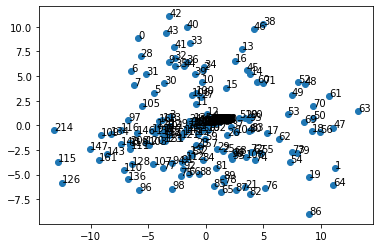

In [ ]:
#visualize embeddings
from sklearn.decomposition import PCA
from matplotlib import pyplot

pca = PCA(n_components=2)
result = pca.fit_transform(w2v_model[w2v_model.wv.vocab])

pyplot.scatter(result[:, 0], result[:, 1], )
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))


In [ ]:
# Encode the logs using the new embedding
encoded_seqs = [[word_vectors[log] for log in sequence] for sequence in string_encoded_arrays]
len(encoded_seqs[0])

1210

In [ ]:
# TODO: pipeline should include model retrain if new vector is encoded
# reload model by uploading the binary/model file

## Prepare Sequences with Varied Lengths
Deep learning libraries assume a vectorized representation of your data. In the case of variable
length sequence prediction problems, this requires that your data be transformed such that each
sequence has the same length. This vectorization allows code to efficiently perform the matrix
operations in batch.

In [ ]:
import keras_preprocessing
SEQLEN = 100 #define length of sequences -> timesteps
# TODO move to top

In [ ]:
#ADD LABELS

normal = files.upload()  
mach_down = files.upload() 
net_discn = files.upload() 
disk_full = files.upload() 

Saving container_1445062781478_0011_01_000001.csv to container_1445062781478_0011_01_000001.csv
Saving container_1445062781478_0016_01_000001.csv to container_1445062781478_0016_01_000001.csv
Saving container_1445062781478_0019_01_000001.csv to container_1445062781478_0019_01_000001.csv
Saving container_1445076437777_0002_01_000001.csv to container_1445076437777_0002_01_000001.csv
Saving container_1445076437777_0005_01_000001.csv to container_1445076437777_0005_01_000001.csv
Saving container_1445087491445_0005_01_000001.csv to container_1445087491445_0005_01_000001.csv
Saving container_1445087491445_0007_01_000001.csv to container_1445087491445_0007_01_000001.csv
Saving container_1445144423722_0021_01_000001.csv to container_1445144423722_0021_01_000001.csv
Saving container_1445144423722_0024_01_000001.csv to container_1445144423722_0024_01_000001.csv
Saving container_1445175094696_0005_01_000001.csv to container_1445175094696_0005_01_000001.csv


Saving container_1445062781478_0012_01_000001.csv to container_1445062781478_0012_01_000001.csv
Saving container_1445062781478_0013_01_000001.csv to container_1445062781478_0013_01_000001.csv
Saving container_1445062781478_0014_01_000001.csv to container_1445062781478_0014_01_000001.csv
Saving container_1445062781478_0015_01_000001.csv to container_1445062781478_0015_01_000001.csv
Saving container_1445062781478_0017_01_000001.csv to container_1445062781478_0017_01_000001.csv
Saving container_1445062781478_0018_01_000001.csv to container_1445062781478_0018_01_000001.csv
Saving container_1445062781478_0020_01_000001.csv to container_1445062781478_0020_01_000001.csv
Saving container_1445076437777_0001_01_000001.csv to container_1445076437777_0001_01_000001.csv
Saving container_1445076437777_0003_01_000001.csv to container_1445076437777_0003_01_000001.csv


Saving container_1445144423722_0020_01_000001.csv to container_1445144423722_0020_01_000001.csv
Saving container_1445144423722_0022_01_000001.csv to container_1445144423722_0022_01_000001.csv
Saving container_1445144423722_0023_01_000001.csv to container_1445144423722_0023_01_000001.csv
Saving container_1445175094696_0001_01_000001.csv to container_1445175094696_0001_01_000001.csv
Saving container_1445175094696_0002_01_000001.csv to container_1445175094696_0002_01_000001.csv
Saving container_1445175094696_0003_01_000001.csv to container_1445175094696_0003_01_000001.csv


Saving container_1445182159119_0001_01_000001.csv to container_1445182159119_0001_01_000001.csv
Saving container_1445182159119_0002_01_000001.csv to container_1445182159119_0002_01_000001.csv
Saving container_1445182159119_0003_01_000001.csv to container_1445182159119_0003_01_000001.csv
Saving container_1445182159119_0004_01_000001.csv to container_1445182159119_0004_01_000001.csv
Saving container_1445182159119_0005_01_000001.csv to container_1445182159119_0005_01_000001.csv
Saving container_1445182159119_0011_01_000001.csv to container_1445182159119_0011_01_000001.csv
Saving container_1445182159119_0013_01_000001.csv to container_1445182159119_0013_01_000001.csv
Saving container_1445182159119_0014_01_000001.csv to container_1445182159119_0014_01_000001.csv


In [ ]:
#from gensim.models import KeyedVectors
# Load back with memory-mapping = read-only, shared across processes.
#seq_embeddings_model = files.upload() 

Saving logs_word2vec.model to logs_word2vec.model


In [ ]:
'''
w2v_model = Word2Vec.load('/content/logs_word2vec.model')
word_vectors = w2v_model.wv
words = list(w2v_model.wv.vocab)
print(len(words))
print(w2v_model.vector_size)
'''

222
100


In [ ]:
word_vectors[str(2)].reshape(1,100)

array([[ 0.22602946, -1.2031094 , -0.3241941 , -1.689001  , -1.4791787 ,
        -0.94839746,  0.26746172,  0.63867676, -0.80809146,  0.02354379,
         0.2830374 , -0.7046832 ,  0.29333925,  0.82182324,  0.13249132,
         0.3385778 , -0.88755006,  1.0723023 , -0.04417915,  0.07603158,
        -0.40061155, -1.6142805 ,  0.15573233, -0.01779751,  1.6008053 ,
        -0.7411393 ,  0.22587577,  0.09746471, -0.14696749,  1.5402725 ,
        -0.59412056,  1.9309449 , -0.96050876,  0.71524173,  0.36622164,
        -0.03938344, -0.27227274,  0.95685416, -0.60300577,  1.4943818 ,
        -0.3229025 , -1.7167056 ,  0.40185836,  0.7152819 , -1.4122106 ,
         0.632966  , -0.42692992,  0.84828717,  0.25556707, -1.0071653 ,
        -1.4566158 , -0.3659904 ,  0.47258842, -0.46973443, -1.3926133 ,
        -0.02189305,  0.7163731 ,  0.90151924,  1.6312512 , -1.0073103 ,
         0.04489486,  0.05249174, -1.2355357 ,  0.5054027 ,  0.5813154 ,
         1.24069   ,  0.23817454,  0.8054105 , -0.7

In [ ]:
seq_files_by_type = {"normal": normal,
                     "machine_down": mach_down,
                     "disk_full": disk_full,
                     "network_disconnect": net_discn}

#def int2w2v(log, word_vectors):
# return word_vectors[str(log)].reshape(1, 100)

def encoded_template_sequences_by_type(dict_type_files):
  dict_enc_seqs_by_type = {}
  for outcome_label, files in dict_type_files.items():
    array_of_sequences = array_of_col_sequences(files, "template") #template is the column of interest in the csv
    if outcome_label not in dict_enc_seqs_by_type:
      dict_enc_seqs_by_type[outcome_label] = [[y for y in label_encoder.fit_transform(x).flat] for x in array_of_sequences]
  return dict_enc_seqs_by_type

dict_int_arrays = encoded_template_sequences_by_type(seq_files_by_type)


In [ ]:
normal = np.array(dict_int_arrays["normal"])
normal[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


[30,
 32,
 33,
 38,
 37,
 36,
 105,
 105,
 105,
 105,
 105,
 105,
 105,
 105,
 98,
 98,
 98,
 23,
 105,
 99,
 101,
 100,
 44,
 47,
 46,
 43,
 42,
 34,
 9,
 12,
 106,
 10,
 10,
 41,
 111,
 4,
 6,
 5,
 5,
 8,
 8,
 7,
 113,
 110,
 112,
 109,
 108,
 96,
 9,
 12,
 10,
 10,
 93,
 89,
 89,
 102,
 87,
 88,
 66,
 104,
 42,
 0,
 42,
 107,
 107,
 56,
 107,
 107,
 56,
 107,
 107,
 56,
 107,
 107,
 56,
 107,
 107,
 56,
 107,
 107,
 56,
 107,
 107,
 56,
 107,
 107,
 56,
 107,
 107,
 56,
 107,
 107,
 56,
 56,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 49,
 72,
 72,
 24,
 71,
 90,
 81,
 83,
 77,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 81,
 83,
 71,
 107,
 55,
 55,
 50,
 53,
 52,
 49,
 107,
 49,
 107,
 49,
 107,
 49,
 107,
 49,
 107,
 49,
 107,
 49,
 107,
 49,
 107,
 49,
 107,
 49,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 64,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 63,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 65,
 65,
 65,
 65,
 54,
 49,
 54,
 49,
 54,


In [ ]:
def subsequences(a, window_size):
    a = np.array(a)
    shape = (a.shape[0] - window_size + 1, window_size) + a.shape[1:]
    strides = (a.strides[0],) + a.strides
    return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)

dict_int_arrays = {
    k: np.array([subsequences(seq, SEQLEN) for seq in seqs if seq]) #check if sequence exists/not empty
    for k, seqs in dict_int_arrays.items()
}

dict_int_arrays = {
    k: keras_preprocessing.sequence.pad_sequences( int_array , maxlen=SEQLEN, padding='post') #pre makes more sense for the domain
    for k, int_array in dict_int_arrays.items()
}

len(dict_int_arrays["normal"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


10

In [ ]:
#[len(x) for x in dict_int_arrays["normal"][0]]

'''
def reshape_inputs_in_dict(arrays_dict):
  d = {}
  for k, v in arrays_dict.items():
    flat = np.array(v).reshape(-1)
    d[k] = flat.reshape((int(flat.shape[0]/SEQLEN), SEQLEN, 1))
  return d


dict_arrays_reshaped = reshape_inputs_in_dict(dict_int_arrays)
dict_arrays_reshaped["machine_down"].shape
'''

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

In [ ]:
'''
import keras_preprocessing
padded_int_sequences = keras_preprocessing.sequence.pad_sequences( integer_encoded_arrays , maxlen=MAXLEN, padding='pre') #return type is np.array

def subsequences(seq, window):
    shape = (seq.size - window + 1, window)
    strides = seq.strides * 2
    return np.lib.stride_tricks.as_strided(seq, shape=shape, strides=strides)

np.array([subsequences(seq, 100) for seq in padded_int_sequences]).shape # (11, 2215, 100) 11 samples, 2215 timesteps, 100 features
#np.array(padded_int_sequences).shape #(11, 2314)
data = np.array(padded_int_sequences)
X = data.reshape((data.shape[0], 1, data.shape[1]))
#TODO: drop arrays that are 100 zeros
'''
#len(dict_arrays_reshaped.values())

4

In [ ]:
normal_seqs = dict_int_arrays["normal"]

In [ ]:
y_binary_label_dict = {"normal": [1, 0],
                "machine_down": [0, 1],
                "disk_full": [0, 1],
                "network_disconnect": [0, 1]}

y_label_dict = {"normal": 0,
                "machine_down": 1,
                "disk_full": 2,
                "network_disconnect": 3}

def dict_to_labelled(dict_arrays, dict_labels):
  labelled_seqs = list()
  for k, v in dict_arrays.items():
    for item in v:
      for seq in item:
        labelled_seqs.append(np.asarray([np.asarray(seq, dtype=np.int), dict_labels[k]]))
  return np.asarray(labelled_seqs)

data = dict_to_labelled(dict_int_arrays, y_label_dict)
binary_data = dict_to_labelled({"normal": dict_int_arrays["normal"]}, y_binary_label_dict)   
print(data[:10, :])
print(data.shape)

[[array([ 51,  20,  21,  21,  20,  21,  20,  21,  21,  20,  21,  21,  20,
        21,  20,  21,  21,  20,  21,  21,  20,  21,  20,  21,  21,  20,
        21,  21,  20,  21,  20,  21,  21,  20,  21,  21,  20,  21,  20,
        21,  21,  20,  21,  21,  20,  21,  20,  21,  21,  20,  21,  17,
        49,  64,  62, 103,  49,  61,  58,  56,  48,  49,  64,  62, 103,
        49,   0,  28,  49,  21,  11,  21,  68,  20,  82,  82,  51,  68,
        51,  20,  21,  20,  21,  21,  20,  20,  21,  20,  21,  21,  20,
        20,  21,  20,  21,  21,  20,  20,  21,  20])
  0]
 [array([ 20,  21,  21,  20,  21,  20,  21,  21,  20,  21,  21,  20,  21,
        20,  21,  21,  20,  21,  21,  20,  21,  20,  21,  21,  20,  21,
        21,  20,  21,  20,  21,  21,  20,  21,  21,  20,  21,  20,  21,
        21,  20,  21,  21,  20,  21,  20,  21,  21,  20,  21,  17,  49,
        64,  62, 103,  49,  61,  58,  56,  48,  49,  64,  62, 103,  49,
         0,  28,  49,  21,  11,  21,  68,  20,  82,  82,  51,  68,  51,
  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
# create labels for sequence segments
y = np.asarray(data[:, 1], dtype=np.int) 
X = np.asarray(data[:, 0])

print(y[:-5])
y=y.reshape(len(y), 1)
y.shape


[0 0 0 ... 3 3 3]


(3300, 1)

In [ ]:
binary_data.shape

(2000, 2)

In [ ]:
 X_binary = np.asarray(binary_data[:, 0])
 X_binary.shape

(2000,)

In [ ]:
#print(X[:-5])
#X.reshape(5400, 1)

def reshape_inputs(arrays):
  tmp=[]
  for x in arrays:
    flat = np.array(x).reshape(-1)
    #print(flat)
    tmp.append(flat)
  return np.array(tmp).reshape((len(arrays), SEQLEN, 1))

X_input_shape = reshape_inputs(X)
X_input_shape.shape #(n, 100, 1) n sample sequences with 100 timesteps over one feature (the encoded log template)
#X_binary = reshape_inputs(X_binary)
#X_binary.shape

(3300, 100, 1)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
y_oh = onehot_encoder.fit_transform(y)
print(y_oh.shape)

(3300, 4)


In [ ]:
#split samples for testing and validation

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_input_shape, y_oh, test_size=0.33, random_state=123, shuffle=True)
#X_train.shape 

In [ ]:
#X_binary_train, X_binary_test = train_test_split(X_binary, test_size=0.2, random_state=42, shuffle=True)

## Define the Model
The first step is to define your network. Neural networks are defined in Keras as a sequence of
layers. The container for these layers is the Sequential class. The first step is to create an instance of the Sequential class. Then you can create your layers and add them in the order that they should be connected. The LSTM recurrent layer comprised of memory units is called LSTM(). A fully connected layer that often follows LSTMlayers and is used for outputting a prediction is called Dense().
For example, we can define an LSTM hidden layer with 2 memory cells followed by a Dense output layer with 1 neuron as follows:

```
model = Sequential()
model.add(LSTM(2))
model.add(Dense(1))
```

But we can also do this in one step by creating an array of layers and passing it to the constructor of the Sequential class.

```
layers = [LSTM(2), Dense(1)]
model = Sequential(layers)
``` 
The first hidden layer in the network must define the number of inputs to expect, e.g. the shape of the input layer. 
Input must be three-dimensional, comprised of samples, time steps,
and features in that order.

* **Samples**. These are the rows in your data. One sample may be one sequence.
* **Time steps**. These are the past observations for a feature, such as lag variables.
* **Features**. These are columns in your data.

In [ ]:
'''
Convert a 1D or 2D dataset (numpy array) to a 3D dataset using reshape(), by  
passing it as argument a tuple of the dimensions to which to transform the data.

Imagine we had 2 columns of input data (X) in a NumPy array. 
We could treat the two columns as two time steps and reshape it as follows:

data = data.reshape((data.shape[0], data.shape[1], 1))

If you would like columns in your 2D data to become features with one time step, 
you can reshape it as follows:

data = data.reshape((data.shape[0], 1, data.shape[1]))
'''


112

Autoencoder:

the idea is to train only on normal data, teach the model how to reconstruct normal sequences, and then use it within a certain threshold to determine what are outliers. This will be used to label inputs for the following model (multiclass). For each outlier sequence, a possible anomaly, give it the label of the file result (machine down, diconnect or full disk).

Problem that it solves: the labels I have are per file (execution). when extracting sequences, I end up with normal sequences in those files that are labelled incorrectly.

 

In [ ]:

#cast to tensors
X_normal = tf.cast(X_binary_train, tf.float32)

# define autoencoder model
model_ae = keras.Sequential()
model_ae.add(LSTM(256, input_shape=(SEQLEN,1), return_sequences=True)) 
model_ae.add(tf.keras.layers.LeakyReLU(alpha=0.25)) #advanced activation to avoid vanishing gradient with relu
model_ae.add(LSTM(128, return_sequences=False))#tanh?
model_ae.add(tf.keras.layers.LeakyReLU(alpha=0.05))
model_ae.add(RepeatVector(SEQLEN))
model_ae.add(LSTM(128, return_sequences=True))
model_ae.add(tf.keras.layers.LeakyReLU(alpha=0.05))
model_ae.add(LSTM(256, return_sequences=True))
model_ae.add(tf.keras.layers.LeakyReLU(alpha=0.25))
model_ae.add(TimeDistributed(Dense(1)))
model_ae.compile(optimizer='adam', loss='mse',  metrics=["accuracy"])

history_ae = model_ae.fit(
    X_normal, X_normal,
    epochs=10, #first train
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

model_ae.summary()

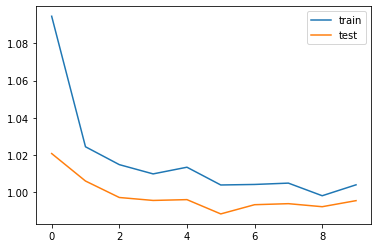

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_ae.history['loss'], label='train')
plt.plot(history_ae.history['val_loss'], label='test')
plt.legend();

a Sequential model is like a pipeline with raw data fed in at one end and
predictions that come out at the other. 

tasks can be split out and added as separate layers, transforming data from input to prediction.

In [ ]:
'''
model = Sequential()
model.add(LSTM(5, input_shape=(2,1))) # The first hidden layer in the network must define the number of inputs to expect, e.g. the shape of the input layer.
model.add(Dense(1))


#or instead:

layers = [LSTM(5, input_shape=(2,1)), Dense(1)]
model = Sequential(layers)

'''

#model.add(Activation( sigmoid )) # activation functions that transform a summed signal from each neuron in a layer can be extracted and added to the Sequential as a layer-like object called Activation.

In [ ]:
#from keras.layers import Embedding, Bidirectional, Dense, LSTM 

model = keras.Sequential()
'''
# embedding layer to use word2vec
w2v_weights = w2v_model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

# Keras Embedding layer with Word2Vec weights initialization
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    weights=[w2v_weights],
                    input_length=MAXLEN,
                    mask_zero=True,
                    trainable=False))
'''
model.add(LSTM(100, input_shape=(SEQLEN, 1), return_sequences=False))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

The choice of activation function is most important for the output layer as it will define the format that predictions will take. For example, below are some common predictive modeling problem types and the structure and standard activation function that you can use in the output layer:
* Regression: Linear activation function, or linear, and the number of neurons matching the number of outputs. This is the default activation function used for neurons in the Dense layer.
* **Binary Classification (2 class)**: Logistic activation function, or sigmoid, and one neuron the output layer.
* **Multiclass Classification (> 2 class)**: Softmax activation function, or softmax, and one output neuron per class value, assuming a one hot encoded output pattern.

In [ ]:
X_input_shape = tf.cast(X_input_shape, tf.float32)
y = tf.cast(y, tf.float32)

In [ ]:
fit_model = model.fit(X_input_shape, y, 
                      epochs=100, batch_size=32, 
                      verbose=1, 
                      validation_split=0.2, #takes from the last samples of data, which is bad because my data is organized by classes (an artifact of how it is imported)...so better to split by hand
                      shuffle=True)

Epoch 1/100
83/83 [==============================] - 6s 73ms/step - loss: 1.0523 - accuracy: 0.5019 - val_loss: 2.9947 - val_accuracy: 0.0909
Epoch 2/100
83/83 [==============================] - 6s 72ms/step - loss: 0.9857 - accuracy: 0.4977 - val_loss: 4.0531 - val_accuracy: 0.0000e+00
Epoch 3/100
83/83 [==============================] - 6s 72ms/step - loss: 0.9392 - accuracy: 0.5413 - val_loss: 4.3639 - val_accuracy: 0.0000e+00
Epoch 4/100
83/83 [==============================] - 6s 71ms/step - loss: 0.8805 - accuracy: 0.5348 - val_loss: 4.9224 - val_accuracy: 0.0000e+00
Epoch 5/100
83/83 [==============================] - 6s 73ms/step - loss: 0.8679 - accuracy: 0.5606 - val_loss: 5.2508 - val_accuracy: 0.0000e+00
Epoch 6/100
83/83 [==============================] - 6s 72ms/step - loss: 0.8740 - accuracy: 0.5739 - val_loss: 5.3670 - val_accuracy: 0.0000e+00
Epoch 7/100
83/83 [==============================] - 6s 72ms/step - loss: 1.0820 - accuracy: 0.4504 - val_loss: 5.2843 - val_acc

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 41,204
Trainable params: 41,204
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('lstm_ints_3')  

INFO:tensorflow:Assets written to: lstm_ints_3/assets


INFO:tensorflow:Assets written to: lstm_ints_3/assets


In [ ]:
!zip -r '/content/lstm_ints_3.zip' '/content/lstm_ints_3'

  adding: content/lstm_ints_3/ (stored 0%)
  adding: content/lstm_ints_3/saved_model.pb (deflated 90%)
  adding: content/lstm_ints_3/variables/ (stored 0%)
  adding: content/lstm_ints_3/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/lstm_ints_3/variables/variables.index (deflated 59%)
  adding: content/lstm_ints_3/keras_metadata.pb (deflated 86%)
  adding: content/lstm_ints_3/assets/ (stored 0%)


In [ ]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]


(None, 100, 1) <dtype: 'float32'>
(None, 4) <dtype: 'float32'>
module_wrapper_2 (None, 100, 1) float32
module_wrapper_3 (None, 100) float32


[None, None]

In [ ]:
fit_model2 = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=10, verbose=1)

Epoch 1/100
335/335 [==============================] - 16s 47ms/step - loss: 0.1783 - accuracy: 0.9245 - val_loss: 0.3883 - val_accuracy: 0.8527
Epoch 2/100
335/335 [==============================] - 16s 47ms/step - loss: 0.1843 - accuracy: 0.9191 - val_loss: 0.1750 - val_accuracy: 0.9079
Epoch 3/100
335/335 [==============================] - 16s 48ms/step - loss: 0.1448 - accuracy: 0.9325 - val_loss: 0.1552 - val_accuracy: 0.9176
Epoch 4/100
335/335 [==============================] - 16s 48ms/step - loss: 0.1414 - accuracy: 0.9316 - val_loss: 0.1541 - val_accuracy: 0.9297
Epoch 5/100
335/335 [==============================] - 16s 48ms/step - loss: 0.1434 - accuracy: 0.9296 - val_loss: 0.1561 - val_accuracy: 0.9206
Epoch 6/100
335/335 [==============================] - 16s 48ms/step - loss: 0.1422 - accuracy: 0.9355 - val_loss: 0.1684 - val_accuracy: 0.9364
Epoch 7/100
335/335 [==============================] - 16s 48ms/step - loss: 0.1444 - accuracy: 0.9304 - val_loss: 0.2126 - val_ac

In [ ]:
model.save('lstm_ints_2')  # creates a HDF5 file 'my_model.h5'
#del model  # deletes the existing model

# returns a compiled model
#from keras.models import load_model
#model = load_model('my_model')


INFO:tensorflow:Assets written to: lstm_ints_2/assets


INFO:tensorflow:Assets written to: lstm_ints_2/assets


In [ ]:
#cast all input arrays to tensors
X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)
y_train = tf.cast(y_train, tf.float32)
y_test = tf.cast(y_test, tf.float32)

model_2 = keras.Sequential() # same lstm but with one hot encoded classes/appropriate loss function

model_2.add(LSTM(100, input_shape=(SEQLEN, 1), return_sequences=False))
model_2.add(Dense(4, activation='softmax'))
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.CategoricalAccuracy()])

In [ ]:
from sklearn.metrics import classification_report

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model_2.predict_classes(X_test)
print(classification_report(Y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.71      0.69      0.70       326
           1       0.70      0.72      0.71       292
           2       0.63      0.66      0.65       256
           3       0.98      0.93      0.95       215

    accuracy                           0.74      1089
   macro avg       0.76      0.75      0.75      1089
weighted avg       0.74      0.74      0.74      1089



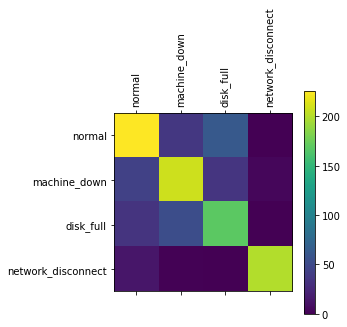

In [ ]:
labels = ["normal",
                "machine_down",
                "disk_full",
                "network_disconnect"]
# Confusion matrix
cf = tf.math.confusion_matrix(Y_test, y_pred)
plt.matshow(cf)
plt.colorbar()
plt.xticks(np.arange(len(labels)), labels=labels, rotation=90)
plt.yticks(np.arange(len(labels)), labels=labels)
plt.clim(0, None)


In [ ]:
history_model_2 = model_2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
35/35 [==============================] - 18s 465ms/step - loss: 1.2694 - accuracy: 0.4120 - categorical_accuracy: 0.4120 - val_loss: 1.1608 - val_accuracy: 0.4619 - val_categorical_accuracy: 0.4619
Epoch 2/100
35/35 [==============================] - 5s 146ms/step - loss: 1.1038 - accuracy: 0.4876 - categorical_accuracy: 0.4876 - val_loss: 1.1054 - val_accuracy: 0.4399 - val_categorical_accuracy: 0.4399
Epoch 3/100
35/35 [==============================] - 5s 148ms/step - loss: 1.0499 - accuracy: 0.5292 - categorical_accuracy: 0.5292 - val_loss: 1.0405 - val_accuracy: 0.5234 - val_categorical_accuracy: 0.5234
Epoch 4/100
35/35 [==============================] - 5s 147ms/step - loss: 0.9918 - accuracy: 0.5744 - categorical_accuracy: 0.5744 - val_loss: 1.0052 - val_accuracy: 0.5914 - val_categorical_accuracy: 0.5914
Epoch 5/100
35/35 [==============================] - 5s 148ms/step - loss: 0.9232 - accuracy: 0.6065 - categorical_accuracy: 0.6065 - val_loss: 1.0682 - val_accura

In [ ]:
model_2.save("lstm_oh_labels_1")

INFO:tensorflow:Assets written to: lstm_oh_labels_1/assets


INFO:tensorflow:Assets written to: lstm_oh_labels_1/assets


In [ ]:
!zip -r 'lstm_oh_labels_1.zip' 'lstm_oh_labels_1'

updating: lstm_oh_labels_1/ (stored 0%)
updating: lstm_oh_labels_1/saved_model.pb (deflated 90%)
updating: lstm_oh_labels_1/variables/ (stored 0%)
updating: lstm_oh_labels_1/variables/variables.data-00000-of-00001 (deflated 6%)
updating: lstm_oh_labels_1/variables/variables.index (deflated 61%)
updating: lstm_oh_labels_1/keras_metadata.pb (deflated 86%)
updating: lstm_oh_labels_1/assets/ (stored 0%)


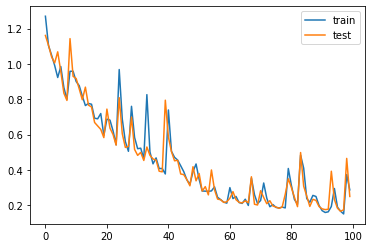

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_model_2.history['loss'], label='train')
plt.plot(history_model_2.history['val_loss'], label='test')
plt.legend();

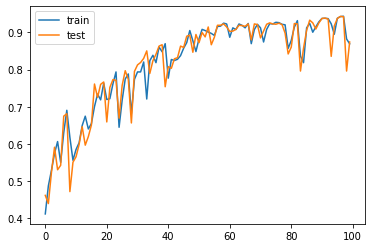

In [ ]:
plt.plot(history_model_2.history['accuracy'], label='train')
plt.plot(history_model_2.history['val_accuracy'], label='test')
plt.legend();

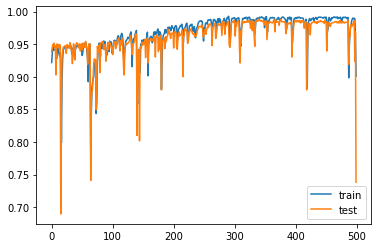

In [ ]:
plt.plot(history_2_model_2.history['accuracy'], label='train')
plt.plot(history_2_model_2.history['val_accuracy'], label='test')
plt.legend();

In [ ]:
history_2_model_2 = model_2.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=500, batch_size=64, verbose=1)

Epoch 1/500
35/35 [==============================] - 5s 148ms/step - loss: 0.2195 - accuracy: 0.9218 - categorical_accuracy: 0.9218 - val_loss: 0.1960 - val_accuracy: 0.9385 - val_categorical_accuracy: 0.9385
Epoch 2/500
35/35 [==============================] - 5s 150ms/step - loss: 0.1791 - accuracy: 0.9353 - categorical_accuracy: 0.9353 - val_loss: 0.1716 - val_accuracy: 0.9449 - val_categorical_accuracy: 0.9449
Epoch 3/500
35/35 [==============================] - 5s 150ms/step - loss: 0.1487 - accuracy: 0.9462 - categorical_accuracy: 0.9462 - val_loss: 0.1359 - val_accuracy: 0.9495 - val_categorical_accuracy: 0.9495
Epoch 4/500
35/35 [==============================] - 5s 149ms/step - loss: 0.1522 - accuracy: 0.9408 - categorical_accuracy: 0.9408 - val_loss: 0.1479 - val_accuracy: 0.9477 - val_categorical_accuracy: 0.9477
Epoch 5/500
35/35 [==============================] - 5s 148ms/step - loss: 0.1524 - accuracy: 0.9412 - categorical_accuracy: 0.9412 - val_loss: 0.1471 - val_accurac

In [ ]:
model_bi = keras.Sequential() #bidirectional model
'''
# embedding layer to use word2vec
w2v_weights = w2v_model.wv.vectors
vocab_size, embedding_size = w2v_weights.shape

# Keras Embedding layer with Word2Vec weights initialization
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_size,
                    weights=[w2v_weights],
                    input_length=MAXLEN,
                    mask_zero=True,
                    trainable=False))
'''
model_2.add(Bidirectional(LSTM(100, input_shape=(SEQLEN, 1), return_sequences=False)))
model_2.add(Dense(4, activation='softmax'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
 
# define baseline model
def baseline_model():
  model = keras.Sequential()
  model.add(Bidirectional(LSTM(100, input_shape=(SEQLEN, 1), return_sequences=False)))
  model.add(Dense(4, activation='softmax'))
	# Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy", "categorical_accuracy", keras.metrics.AUC()])
  return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=10, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
fit_model_2_01 = model_bi.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=100, batch_size=10, verbose=1)